# Pré processamento

## Imports e configurações

In [1]:
# Import de Enums
from Enums.ModelsType import ModelsType
from Enums.Balances import BalanceTypes
from Enums.OutliersDetectors import OutliersDetectors
from Enums.OutliersRemovers import OutliersRemovers
from Enums.Scalers import ScalerTypes
from Enums.ColunsDatasetColuns import DatasetColuns
# Import de Strategies
from Strategies.ModelStrategy import ModelStrategy
from Strategies.BalanceStrategy import BalanceStrategy
from Strategies.ScalerStrategy import ScalerStrategy
from Strategies.OutlierDetectorStrategy import OutlierDetectorStrategy
from Strategies.OutlierRemoverStrategy import OutlierRemoverStrategy
# Import de DataLoaders
from DataLoader.DataLoading import DataLoader
# Import de DataEngineering
from DataEngineering.DataTypeValidator import DataTypeValidator
from DataEngineering.DataExplorer import DataExplorer
from DataEngineering.BalanceAnalyzer import BalanceAnalyser
from DataEngineering.DataScaler import DataScaler
from DataEngineering.DataVisualizer import DataVisualizer
from DataEngineering.OutlierAnalyser import OutlierAnalyzer
from DataEngineering.FeatureSelector import FeatureSelector
from DataEngineering.FeatureEngeneering import FeatureEngineer
# Imports de bibliotecas
from sklearn.base import clone
import copy

main_model = ModelStrategy().ModelStrategy(ModelsType.LogisticRegression.value)
target_column = DatasetColuns.DEATH_EVENT.value

strategy_balance = BalanceStrategy()
outlier_detector_strategy = OutlierDetectorStrategy()
outlier_remover_strategy = OutlierRemoverStrategy()
scaler_strategy = ScalerStrategy()
balance_strategy = BalanceStrategy()

## Carregamento do Dataset

Para começarmos os tratamentos de dados, primeiro vamos fazer uma análise sobre o data set. Para isso precisamos carrega-lo.

In [2]:
#Carregando o dataset
dataLoader = DataLoader('./Datasets/heart_failure_clinical_records_dataset.csv')
dataset = dataLoader.load_data()

Dataset carregado com sucesso!


## Exploração dos Dados (EDA)

Agora que ja carregamos o dataset, vamos fazer as primeiras análises básicas para entender como os dados são organizados, podendo ver tambem os seus tipos.

#### Análise Inicial

In [3]:
#Análise inicial
data_explorer = DataExplorer()
data_explorer.analyze(dataset)

Primeiras linhas do dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1



Resumo estatístico do dataset:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000



Informações sobre os tipos de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
me

#### Análise dos tipos das featues

In [4]:
# Validação dos tipos de dados
data_type_validator = DataTypeValidator(dataset)
data_type_validator.validate_types()


Tipos de dados antes da validação:
age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Validação concluída.


#### Identificação de outliers

Nesta etapa tentaremos identificar se há alguma valor absurdo para alguma feature, ou seja, valores que não podem ser medidos em humanos podendo identificar se houve erros durante a captura dos dados. Para isso usaremos a função "check_custom_limits" da classe OutlierAnalyzer que verifica baseado no dicionario "features_limits".

In [5]:
outlier_analyzer = OutlierAnalyzer(dataset, target_column, outlier_detector_strategy, outlier_remover_strategy)
outlier_analyzer.check_custom_limits()

{}

Não há valores que possam corresponder a erros de leitura dos aparelhos ou valores que não possa ser encontrados em seres humanos.

## Balanceamento de classes

Nesta etapa trataremos o balanceamto da nossa classe alvo. Primeiro verificamos o balaceamento incial e depois qual método de balanceamento melhor se adequa ao nosso cenário.

### Avaliando Balanceamento inicial

Distribuição da variável-alvo:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
0    0.67893
1    0.32107
Name: count, dtype: float64


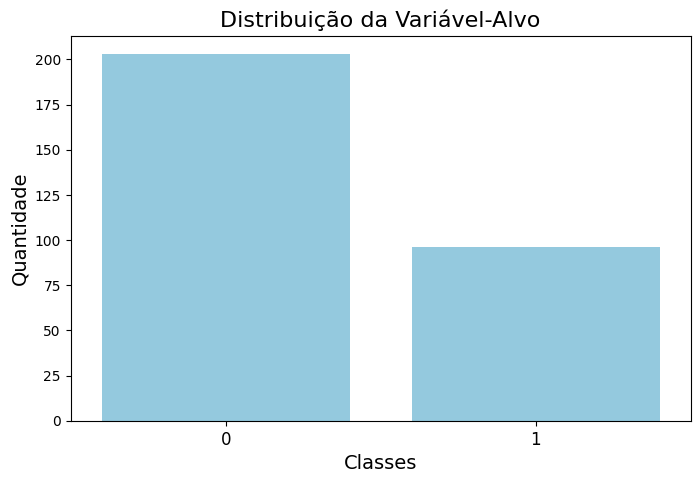

In [6]:
# Instanciar o analisador de desbalanceamento
balance_analyser = BalanceAnalyser(dataset, DatasetColuns.DEATH_EVENT.value, balance_strategy)

# Analisar o desbalanceamento
balance_analyser.analyze_distribution()

Percebe-se um desbalanceamento em nossa classe alvo, no qual há menos registros de mortes. Sendo assim, precisamos fazer o balanceamento entre as duas classes para que nosso modelo de predição tenha um melhor desempenho.

Vamos testar 3 abordagens para ver qual se adequa melhor ao nosso problema. As abordagens escolhidas sào: oversampling, undersamplig e SMOTETomek, que é uma combinação entre oversampling e undersampling.

### Balancemaneto com Oversampling

In [7]:
# Oversampling
balance_analyser.cross_val_evaluate(main_model, BalanceTypes.Oversampling.value)

Resultados para oversampling:
Acurácia: 0.84
Precisão: 0.74
Recall: 0.76
F1-Score: 0.75


### Balanceamento por Undersampling

In [8]:
# UNDERSAMPLING
balance_analyser.cross_val_evaluate(main_model, BalanceTypes.Undersampling.value)

Resultados para undersampling:
Acurácia: 0.80
Precisão: 0.67
Recall: 0.77
F1-Score: 0.71


### Balanceamento por SMOTETomek

In [9]:
# SMOTETomek
balance_analyser.cross_val_evaluate(main_model, BalanceTypes.SMOTETomek.value)

Resultados para smotetomek:
Acurácia: 0.84
Precisão: 0.75
Recall: 0.76
F1-Score: 0.75


### Comparação das estratégias de balanceamento

In [10]:
# Comparar os resultados
best_strategy = balance_analyser.compare_strategies()
print(f"Melhor estratégia de balanceamento: {best_strategy}")

O melhor método é: smotetomek com pontuação 3.10
Melhor estratégia de balanceamento: ['smotetomek']


## Identificação e Tratamento de Outliers

Feito o balanceamento da nossa classe alvo, agora faremos a identificação de outliers estatísticos do nosso dataset, pois osmodelos de identificação binária podemos não se comportar muito bom com Outliers. Seguindo a mesma abordagem de verificar qual a técnica de tratamento trará melhor resultado em nosso modelo.

### Visualização inicial - Histogramas

Primeiro faremos uma análise visual para verificar como nossos dados estào distribuídos, pois isso irá influenciar em nossa abordagem para identificaçao e tratamento dos mesmos.

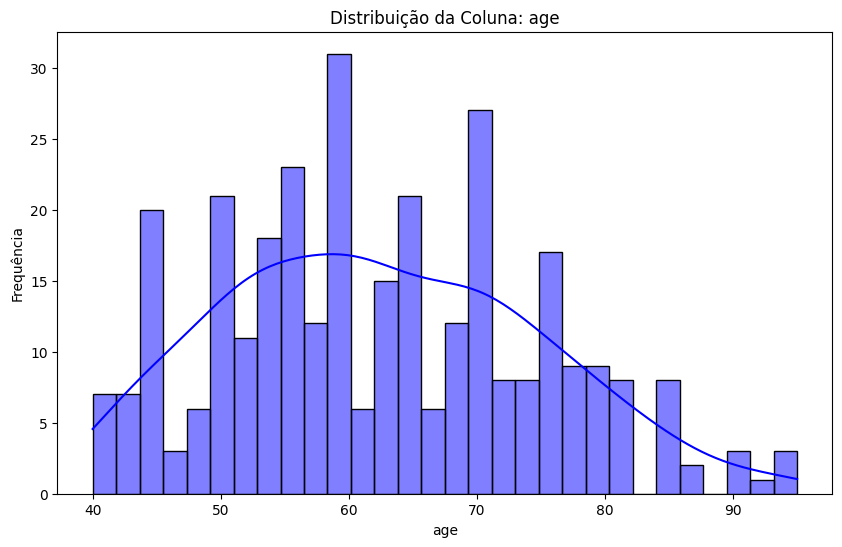

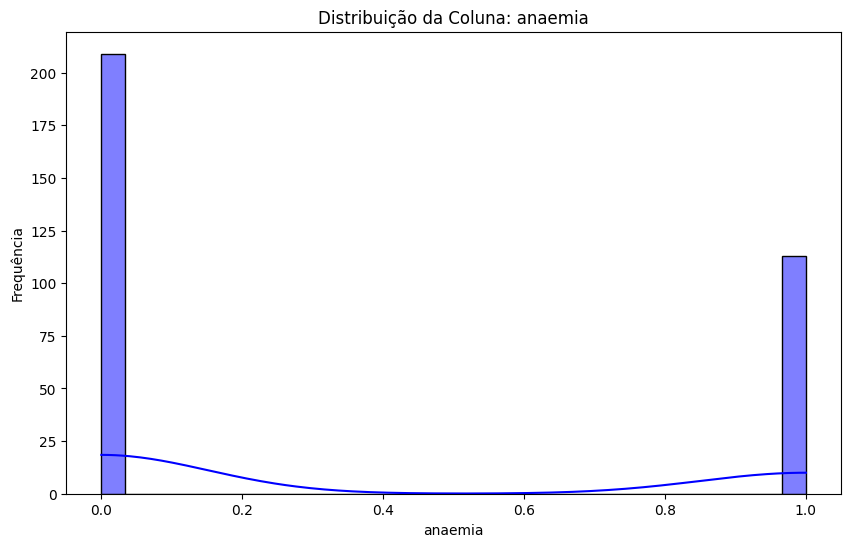

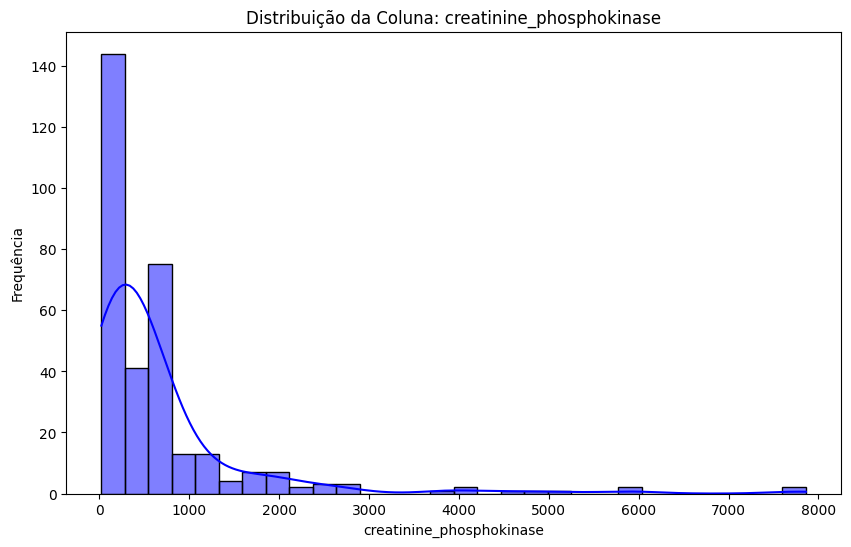

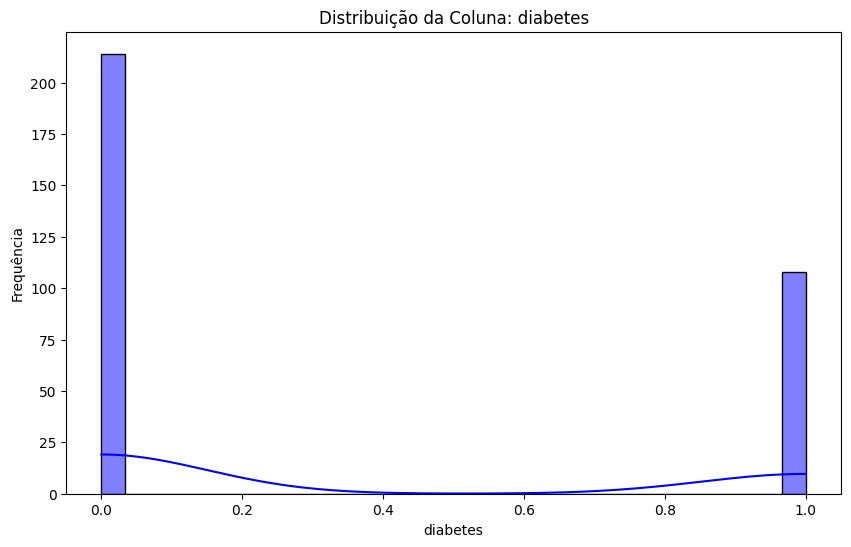

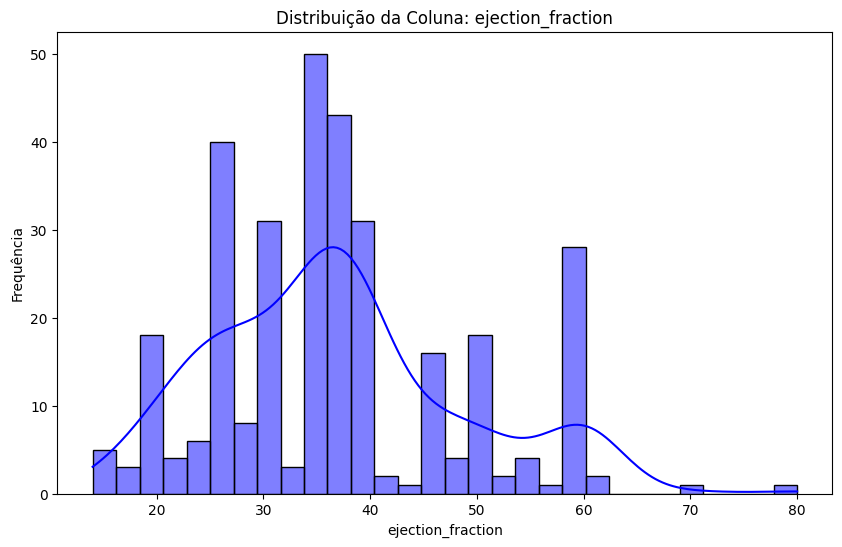

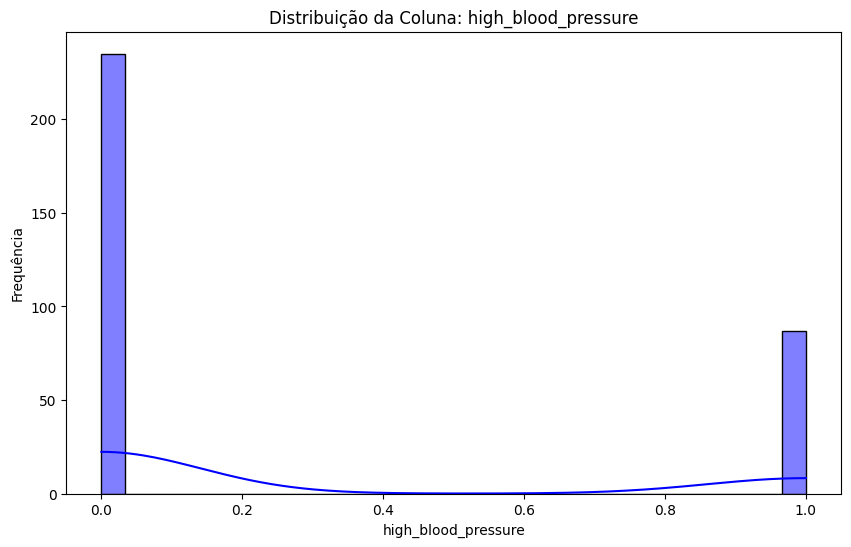

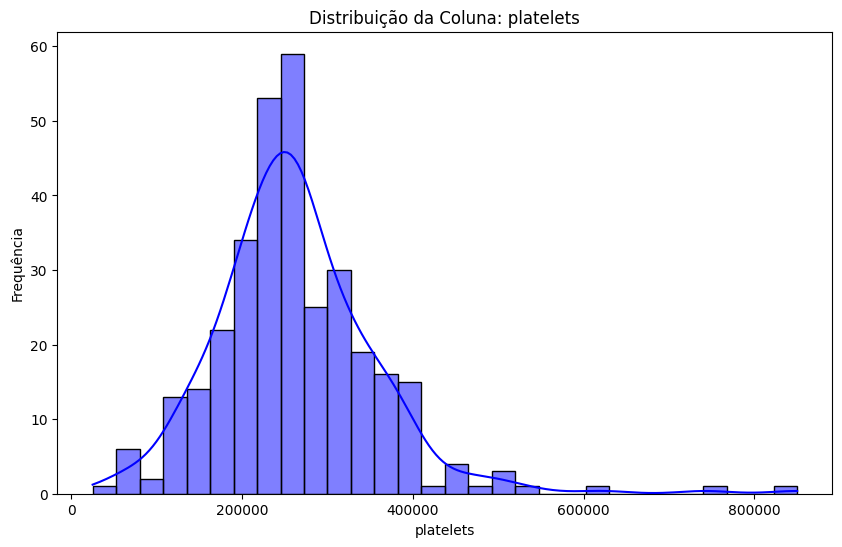

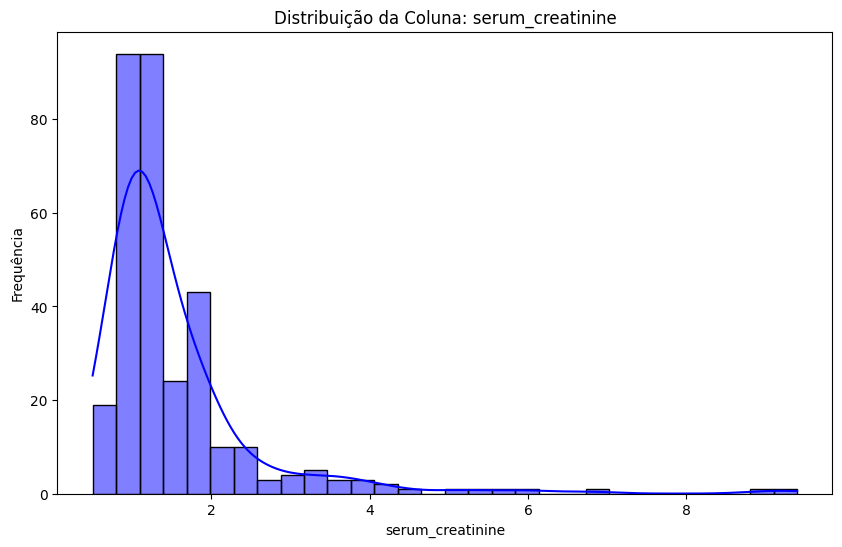

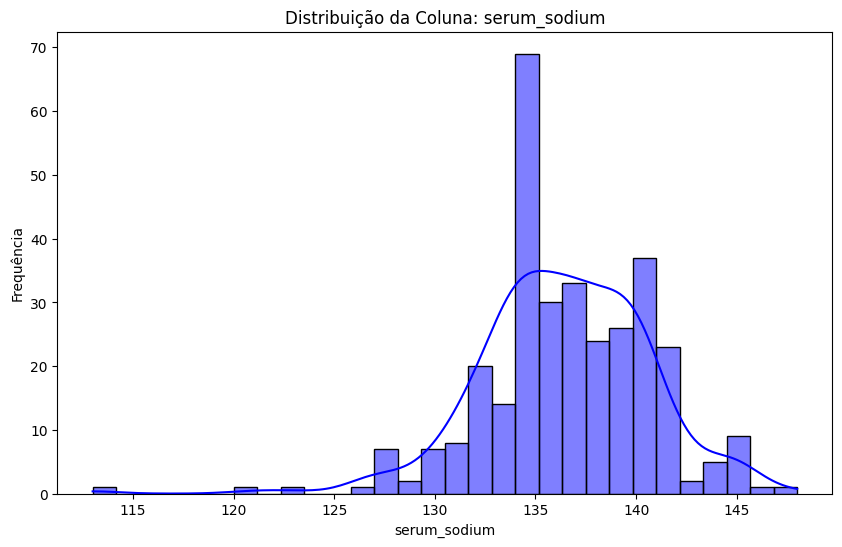

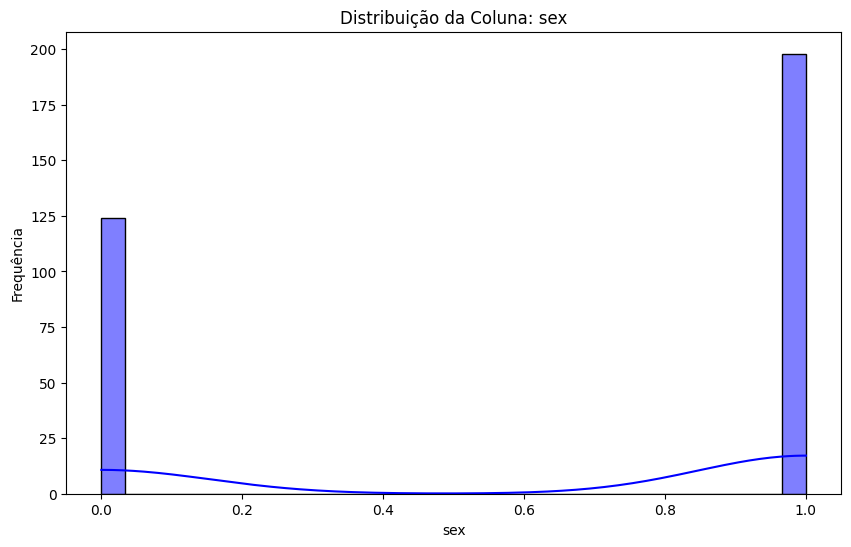

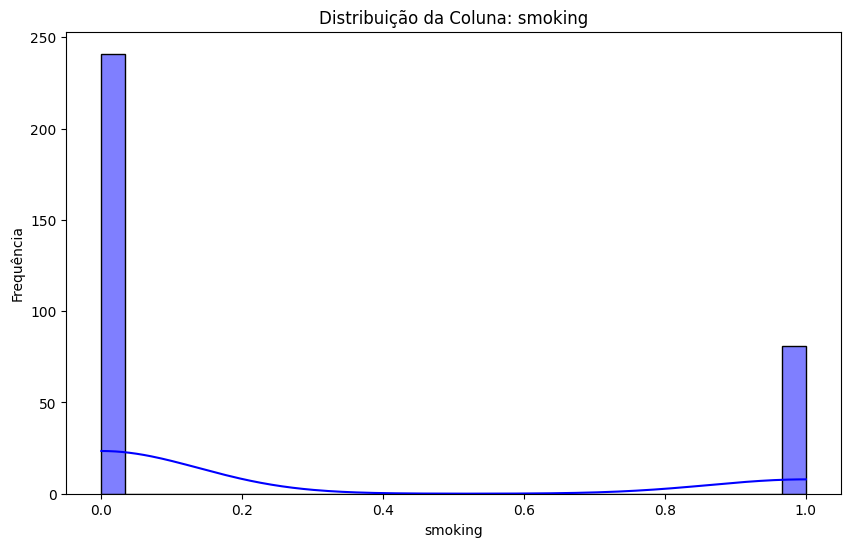

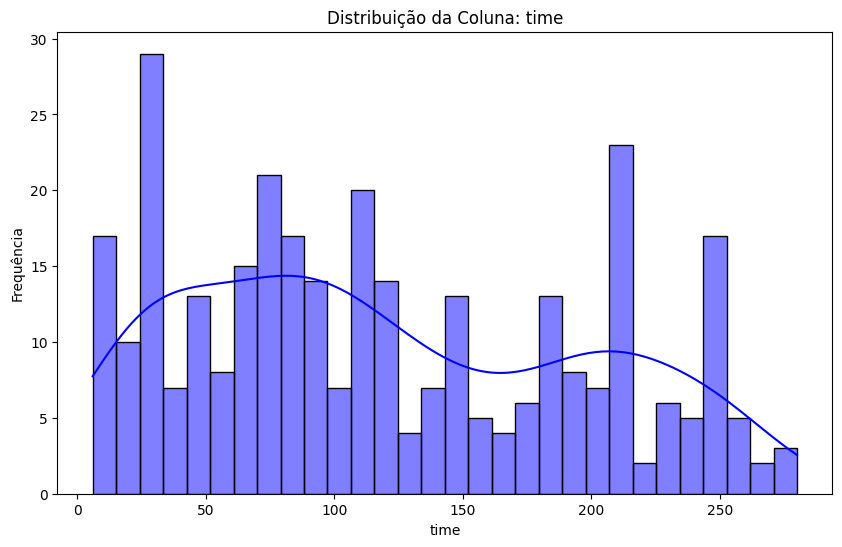

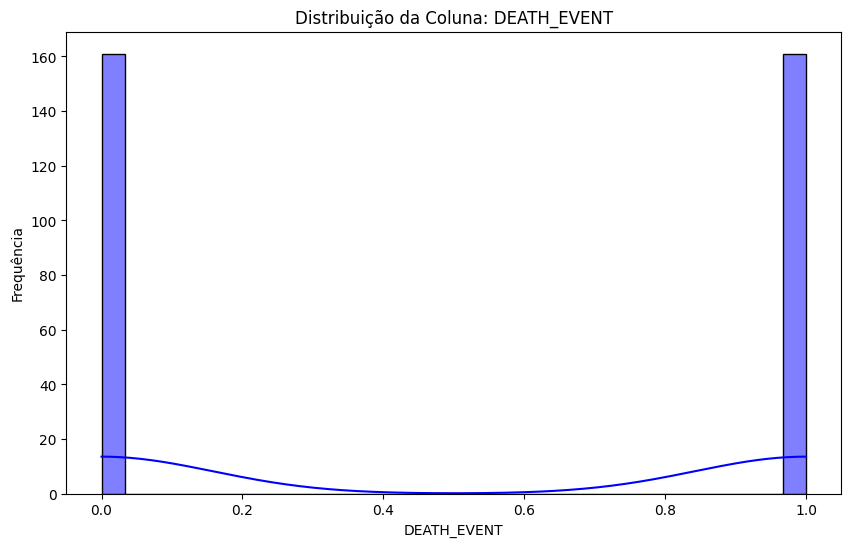

In [11]:
balace_dataset = balance_analyser.balance(BalanceTypes.SMOTETomek.value)

# Análise visual de distribuições e outliers
data_visualizer = DataVisualizer(balace_dataset)
data_visualizer.plot_distributions()

### Identificação de Outliers

Agora seguimos para dois metodos de identificação de outliers: IQR e Z-Score.

#### Preparando o data set

Primeiro nós vamos balancear o dataset para postorior análise de outliers, pois o balanceamento pode me gerar mais outliers

In [12]:
analizer_balance = BalanceAnalyser(dataset, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset = analizer_balance.balance(BalanceTypes.SMOTETomek.value)

outlier_analyzer = OutlierAnalyzer(balance_dataset, target_column, outlier_detector_strategy, outlier_remover_strategy)

#### Detecção por IQR 

In [13]:
# Detectar outliers usando o método IQR
print(f"Detecção de outlers por IQR")
outliers_iqr = outlier_analyzer.detect_outliers(OutliersDetectors.IQR.value)

Detecção de outlers por IQR
Coluna 'creatinine_phosphokinase' possui 38 outliers: [0, 23, 33, 39, 50, 73, 76, 95, 98, 102, 110, 112, 115, 123, 129, 134, 142, 156, 171, 187, 190, 215, 217, 229, 230, 231, 240, 253, 260, 262, 272, 283, 286, 295, 301, 303, 316, 319]
Coluna 'ejection_fraction' possui 32 outliers: [4, 29, 33, 42, 53, 62, 65, 67, 79, 82, 84, 85, 87, 92, 95, 97, 100, 110, 113, 125, 130, 133, 136, 145, 151, 152, 158, 164, 194, 201, 230, 290]
Coluna 'platelets' possui 9 outliers: [47, 74, 78, 84, 159, 169, 213, 221, 230]
Coluna 'serum_creatinine' possui 25 outliers: [5, 15, 18, 21, 24, 31, 33, 43, 84, 90, 94, 96, 164, 172, 216, 235, 262, 267, 273, 278, 293, 300, 304, 315, 317]
Coluna 'serum_sodium' possui 5 outliers: [10, 150, 180, 266, 282]


#### Detecção por Z-Score

In [14]:
# Detectar outliers usando o método Z-Score
print(f"Detecção de outlers por Z-Score")
outliers_zscore = outlier_analyzer.detect_outliers(OutliersDetectors.ZSCORE.value)

Detecção de outlers por Z-Score
Coluna 'creatinine_phosphokinase' possui 10 outliers: [0, 33, 39, 50, 73, 98, 129, 262, 283, 286]
Coluna 'ejection_fraction' possui 1 outliers: [42]
Coluna 'platelets' possui 3 outliers: [74, 78, 230]
Coluna 'serum_creatinine' possui 7 outliers: [5, 15, 33, 96, 164, 172, 262]
Coluna 'serum_sodium' possui 3 outliers: [10, 150, 266]


Percebe-se que os dois métodos encontram outliers nas mesmas features, porém o IQR identifica um número maior. Como nossos dados não seguem uma distribuição normal, o método mais recomendado para verificação de outliers é o IQR.

### Boxplot colunas com outliers

Podemos então plotar boxPlot para as colunas listadas acima

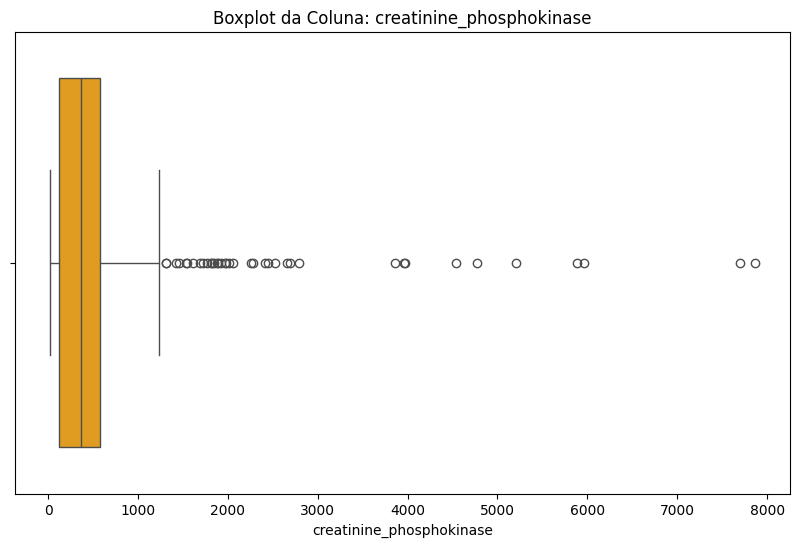

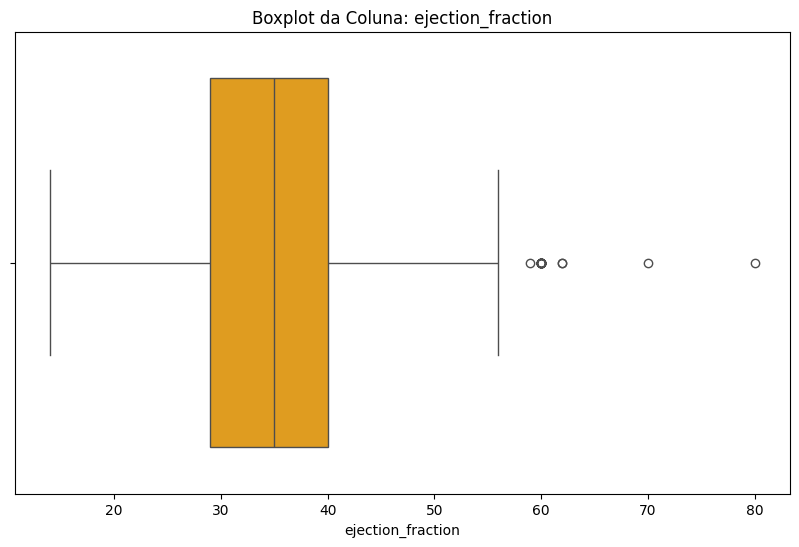

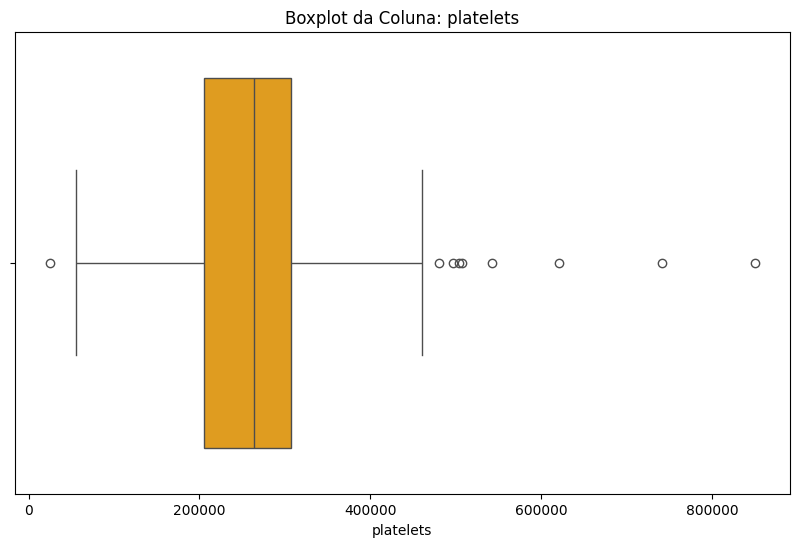

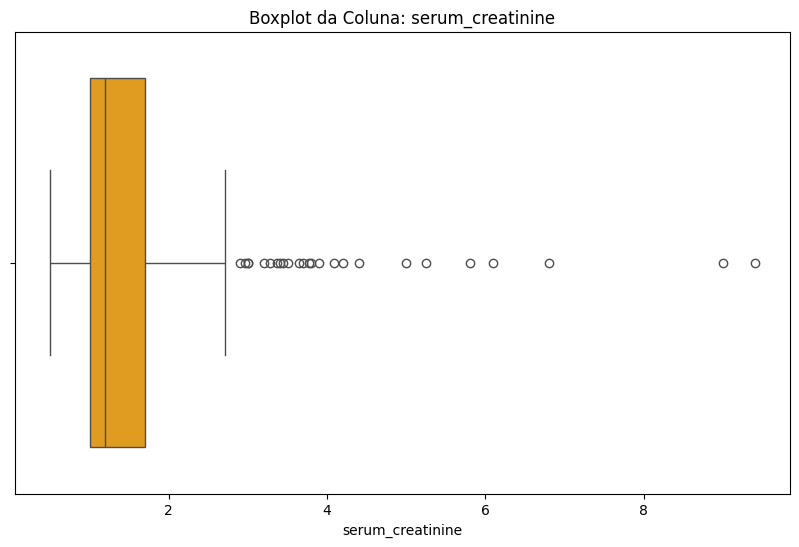

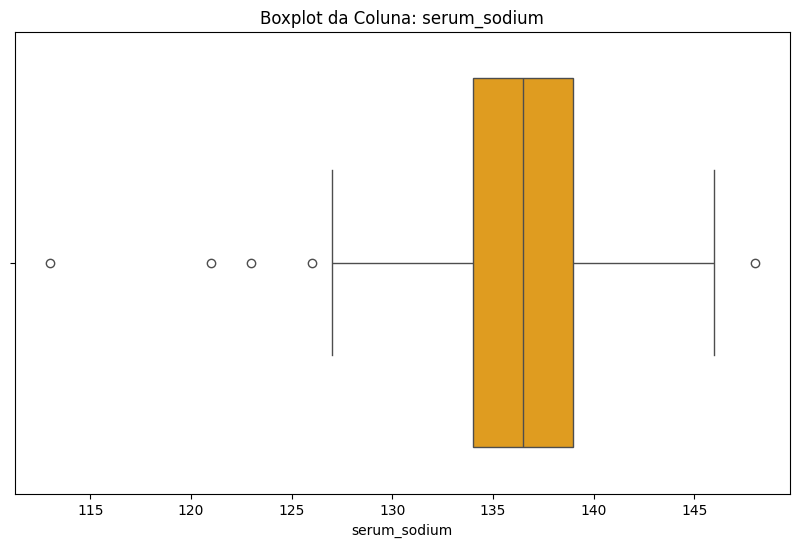

In [15]:
# Filtrar as colunas que possuem outliers detectados pelo IQR
columns_with_outliers = [column for column, indices in outliers_iqr.items() if indices]

# Plotar boxplots apenas para as colunas com outliers
data_visualizer.plot_boxplots(columns_with_outliers)

### Tratamento dos outliers

Há várias formas para fazer o tratamento de outliers, nós abordaremos 3 que são: transformação logaritmica, raiz quadrada e yeo-johnson. Não usaremos o de remoção pois nossa base de dados é pequena, então não seria interessante remover dados.

#### Logaritimica

In [16]:
dataset_log = outlier_analyzer.transform(OutliersRemovers.LOGARITIMO.value)
outlier_analyzer_log = OutlierAnalyzer(dataset_log, target_column, outlier_detector_strategy, outlier_remover_strategy)
outliers_log = outlier_analyzer_log.detect_outliers(OutliersDetectors.IQR.value)

Coluna 'creatinine_phosphokinase' possui 4 outliers: [0, 39, 50, 286]
Coluna 'ejection_fraction' possui 9 outliers: [3, 8, 42, 44, 164, 241, 256, 298, 320]
Coluna 'platelets' possui 12 outliers: [10, 74, 78, 126, 134, 174, 213, 230, 237, 266, 291, 319]
Coluna 'serum_creatinine' possui 20 outliers: [5, 15, 21, 31, 33, 90, 94, 96, 164, 172, 216, 235, 262, 267, 273, 293, 300, 304, 315, 317]
Coluna 'serum_sodium' possui 5 outliers: [10, 150, 180, 266, 282]
Coluna 'time' possui 3 outliers: [0, 1, 2]


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### Raiz Quadrada

In [17]:
dataset_raiz = outlier_analyzer.transform(OutliersRemovers.RAIZ_QUADRADA.value)
outlier_analyzer_raiz = OutlierAnalyzer(dataset_raiz, target_column, outlier_detector_strategy, outlier_remover_strategy)
outliers_raiz = outlier_analyzer_raiz.detect_outliers(OutliersDetectors.IQR.value)

Coluna 'creatinine_phosphokinase' possui 24 outliers: [0, 23, 33, 39, 50, 73, 98, 112, 123, 129, 142, 156, 171, 187, 190, 215, 230, 231, 240, 253, 262, 283, 286, 303]
Coluna 'ejection_fraction' possui 35 outliers: [3, 4, 8, 29, 33, 42, 44, 53, 62, 65, 67, 79, 82, 84, 85, 87, 92, 95, 97, 100, 110, 113, 125, 130, 133, 136, 145, 151, 152, 158, 164, 194, 201, 230, 241]
Coluna 'platelets' possui 14 outliers: [10, 74, 78, 84, 126, 169, 174, 213, 221, 230, 237, 266, 291, 319]
Coluna 'serum_creatinine' possui 21 outliers: [5, 15, 21, 31, 33, 84, 90, 94, 96, 164, 172, 216, 235, 262, 267, 273, 293, 300, 304, 315, 317]
Coluna 'serum_sodium' possui 5 outliers: [10, 150, 180, 266, 282]


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### Yeo-johnson

In [18]:
dataset_yeo = outlier_analyzer.transform(OutliersRemovers.YEOJOHNSON.value)
outlier_analyzer_yeo = OutlierAnalyzer(dataset_yeo, target_column, outlier_detector_strategy, outlier_remover_strategy)
outliers_yeo = outlier_analyzer_yeo.detect_outliers(OutliersDetectors.IQR.value)

Coluna 'ejection_fraction' possui 9 outliers: [3, 8, 42, 44, 164, 241, 256, 298, 320]
Coluna 'platelets' possui 14 outliers: [10, 74, 78, 84, 126, 169, 174, 213, 221, 230, 237, 266, 291, 319]
Coluna 'serum_creatinine' possui 1 outliers: [190]
Coluna 'serum_sodium' possui 5 outliers: [10, 33, 150, 180, 266]


#### Comparando estratégias de tratamento de outliers

In [19]:
model_transform = clone(main_model)
# 3. Comparar Transformações
best_transformation = outlier_analyzer.compare_transformations(model_transform)

logaritimo - Accuracy: 0.8788, Precision: 0.8717, Recall: 0.8945, F1-Score: 0.8816
raiz_quadrada - Accuracy: 0.8820, Precision: 0.8729, Recall: 0.9008, F1-Score: 0.8851
yeojohnson - Accuracy: 0.8758, Precision: 0.8667, Recall: 0.8945, F1-Score: 0.8788
A melhor transformação é: raiz_quadrada com pontuação 3.54


A transformação Logarítimica se mostrou mais eficaz tanto na redução de outliers quanto na validação do meu modelo.

## Normalização e Padronização de variáveis


Nesta etapa vamos abordar algumas técnicas de normalizaçao e padronização para validar qual se adequa melhor ao nosso propósito, pois alguns algorítimos de Machine Learning podem ser sensíveis a escala dos dados.

Para nossa estratégia vamos testar a normalizaçao e a padronização e testar em um modelo de Regressão Logística para comparar os resultados. Primeiro iremos balancear e tratar os outliers com os métodos definidos nas etapas anteriores.

In [45]:
# Balanceamento
analizer_balance_norm = BalanceAnalyser(dataset, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_norm = analizer_balance_norm.balance(BalanceTypes.SMOTETomek.value)
# Tratar outliers
outlier_analyzer_norm = OutlierAnalyzer(balance_dataset_norm, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_norm = outlier_analyzer_norm.transform(OutliersRemovers.LOGARITIMO.value)
# Criar DataScaler
data_scaler = DataScaler(dataset_log_norm, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


### Normalização por MinMax Scaler

In [39]:
# Aplicar MinMax e validação cruzada
data_scaler.cross_val_evaluate(main_model, ScalerTypes.MinMaxScaler.value)

Resultados para minmax:
Acurácia: 0.88
Precisão: 0.87
Recall: 0.90
F1-Score: 0.89


### Normalização por Padronização

In [40]:
# Aplicar padronização e validação cruzada
data_scaler.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)

Resultados para standard:
Acurácia: 0.88
Precisão: 0.87
Recall: 0.90
F1-Score: 0.89


### Normalização RobustScaler

In [41]:
# Aplicar RobustScaler e validação cruzada
data_scaler.cross_val_evaluate(main_model, ScalerTypes.RobustScaler.value)

Resultados para robust:
Acurácia: 0.88
Precisão: 0.87
Recall: 0.90
F1-Score: 0.89


### Normalização por MaxAbsScaler

In [42]:
# Aplicar MaxAbsScaler e validação cruzada
data_scaler.cross_val_evaluate(main_model, ScalerTypes.MaxAbsScaler.value)

Resultados para maxabs:
Acurácia: 0.88
Precisão: 0.87
Recall: 0.90
F1-Score: 0.89


### Normalizaçao por Normalizer

In [43]:
# Aplicar Normalizer e validação cruzada
data_scaler.cross_val_evaluate(main_model, ScalerTypes.Normalizer.value)

Resultados para normalizer:
Acurácia: 0.85
Precisão: 0.84
Recall: 0.88
F1-Score: 0.86


### Verificando qual modelo tem melhor desempenho

In [26]:
# Determinar o melhor método
best_scaling_method = data_scaler.find_best_scaling_method()

Empate entre os seguintes métodos com pontuação 3.54: minmax, standard, robust, maxabs


Modelos para classificação binária (nosso objetvo) como Regressão Linear, SVM e KNN, são mais sensíveis a escala dos dados o que justifica o StandardScaler a ser o tipo de padronização que obteve o melhor desempenho.

## Feature Selection

Nesta etapa veremos a correlação entre as variáveis pa verificar se há alguma feature que tenha um alto nível de correlação com outra. Se verificar-mos um alto índice de correlação, geralmente considerados acima de 0.8, avaliaremos o modelo após a remoção dessa feature

### Matriz de Correlação

Neste tópico iremos plotar a matriz de correlação para verificarmos a correlação entre as variáveis e tomar-mos as devidas estratégias de tratamento.

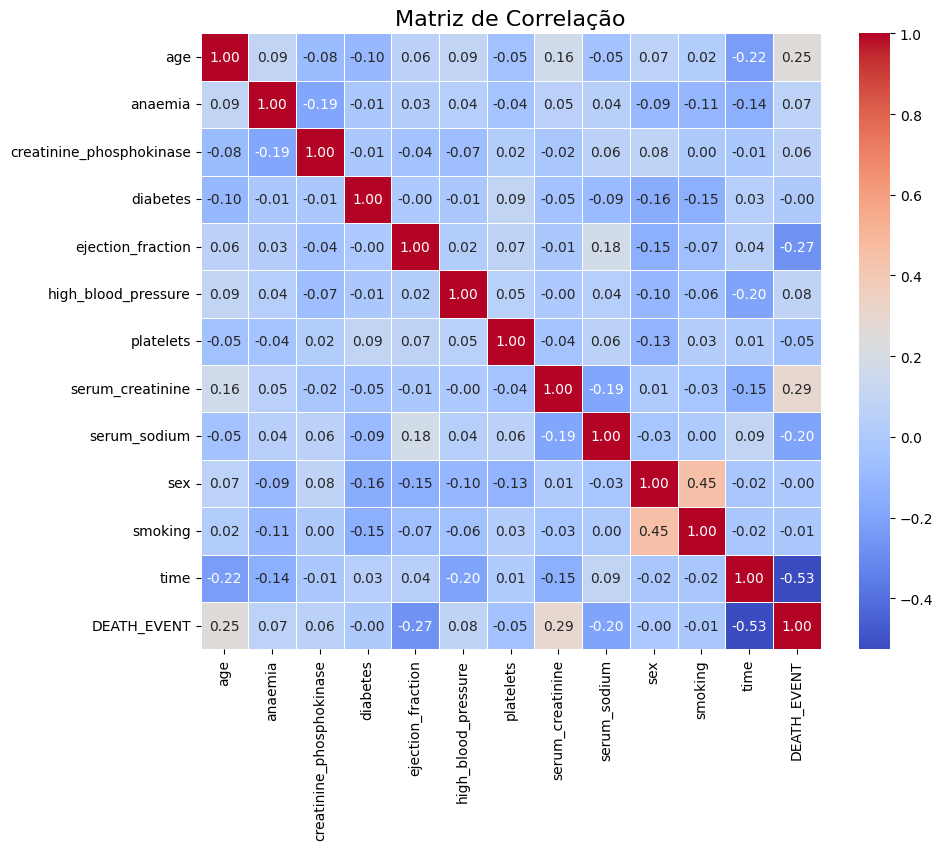

Nenhum par de atributos com correlação alta encontrado.


In [27]:
# Instanciar a classe FeatureSelector
feature_selector = FeatureSelector(dataset)

# Analisar correlação e definir o threshold
high_corr_pairs = feature_selector.analyze_correlation(threshold=0.8)

### Remoção da feature "TIME"

Não idendificamos nenhuma feature com alta correlação, porém não sabemos ao certo o que a varável "TIME" quer nos dizer, podendo ser o tempo de duração do acompanhamento ou também o tempo em que a pessoa levou até a morte depois do início do acompnhamento. Sendo assim, iremos verificar o desempenho do modelo sem essa feature.

In [28]:
# Colunas que deseja remover
columns_to_remove = ["time"]

# Remover a coluna do dataset original
updated_dataset = feature_selector.drop_columns(columns_to_remove)

Removendo as colunas: ['time']


In [29]:
# Balanceamento
analizer_balance_select = BalanceAnalyser(updated_dataset, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_select = analizer_balance_select.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_select = OutlierAnalyzer(balance_dataset_select, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_select = outlier_analyzer_select.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_select = DataScaler(dataset_log_select, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
print("Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:")
data_scaler_select.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_select.find_best_scaling_method()

Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.81
Precisão: 0.79
Recall: 0.84
F1-Score: 0.81
O melhor método é: standard com pontuação 3.25


['standard']

Percebe-se uma baixa significativa no desempenho do modelo sem esta feature. Devido a isso e não identificarmos features que são altamente correlacionadas não tiraremos nenhuma coluna.

## Feature Engeneering

Nesta etapa vamos criar novas features a partir da que ja temos e avaliar o modelo. Nosso objetivo é tentar ver se essas novas features ajudarão a melhorar o desempenho do modelo na predição de casos de insuficiência cardíaca.

Realizando algumas pesquisas percebemos 3 possíveis oportunidades, são elas:

- age * ejection_fraction: Idade pela fração de ejeção pode indicar o impacto da idade na saúde cardíaca.
- serum_creatinine * serum_sodium: Relacionar esses dois fatores pode indicar um nível mais grave de problemas renais.
- serum_creatinine / serum_sodium: Pode capturar uma relação específica entre os níveis de creatinina e sódio no soro.

Vamos primeiro avaliar a adição de cada um no dataset e depois a combinação deles

### Age * Ejection_Fraction

In [30]:
dataset_age_ejection_fraction = copy.copy(dataset)

# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_age_ejection_fraction = FeatureEngineer(dataset_age_ejection_fraction)

# Adicionar features de interação no conjunto de treino
coluns_age_ejection_fraction = [DatasetColuns.age.value, DatasetColuns.age.value]

#feature_engineer.add_interaction_features(coluns)
feature_engineer_age_ejection_fraction.add_interaction_features(coluns_age_ejection_fraction)

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_age_ejection_fraction = feature_engineer_age_ejection_fraction.get_dataset()

# Balanceamento
analizer_balance_age_ejection = BalanceAnalyser(dataset_age_ejection_fraction, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_age_ejection = analizer_balance_age_ejection.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_age_ejection = OutlierAnalyzer(balance_dataset_age_ejection, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_age_ejection = outlier_analyzer_age_ejection.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_age_ejection = DataScaler(dataset_log_age_ejection, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
print("Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:")
data_scaler_age_ejection.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_age_ejection.find_best_scaling_method()


Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.87
Precisão: 0.85
Recall: 0.92
F1-Score: 0.88
O melhor método é: standard com pontuação 3.52


['standard']

### Serum_creatinine * Serum_sodium

In [31]:
dataset_creatine_sodium = copy.copy(dataset)

# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_creatine_sodium = FeatureEngineer(dataset_creatine_sodium)

# Adicionar features de interação no conjunto de treino
coluns_creatine_sodium = [DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]

#feature_engineer.add_interaction_features(coluns)
feature_engineer_creatine_sodium.add_interaction_features(coluns_creatine_sodium)

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_creatine_sodium = feature_engineer_creatine_sodium.get_dataset()

# Balanceamento
analizer_balance_creatinine_sodium = BalanceAnalyser(dataset_creatine_sodium, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_creatinine_sodium = analizer_balance_creatinine_sodium.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_creatinine_sodium = OutlierAnalyzer(balance_dataset_creatinine_sodium, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_creatinine_sodium = outlier_analyzer_creatinine_sodium.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_creatinine_sodium = DataScaler(dataset_log_creatinine_sodium, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
print("Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:")
data_scaler_creatinine_sodium.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_creatinine_sodium.find_best_scaling_method()

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.88
Precisão: 0.86
Recall: 0.91
F1-Score: 0.88
O melhor método é: standard com pontuação 3.53


['standard']

### Serum_creatinine / Serum_sodium

In [32]:
dataset_creatinine_sodium_2 = copy.copy(dataset)
# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_creatinine_sodium_2 = FeatureEngineer(dataset_creatinine_sodium_2)

# Adicionar features de razão no conjunto de treino
feature_engineer_creatinine_sodium_2.add_ratio_features()

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_creatinine_sodium_2 = feature_engineer_creatinine_sodium_2.get_dataset()

# Balanceamento
analizer_balance_creatinine_sodium_2 = BalanceAnalyser(dataset_creatinine_sodium_2, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_creatinine_sodium_2 = analizer_balance_creatinine_sodium_2.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_creatinine_sodium_2 = OutlierAnalyzer(balance_dataset_creatinine_sodium_2, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_creatinine_sodium_2 = outlier_analyzer_creatinine_sodium_2.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_creatinine_sodium_2 = DataScaler(dataset_log_creatinine_sodium_2, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
print("Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:")
data_scaler_creatinine_sodium_2.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_creatinine_sodium_2.find_best_scaling_method()


Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']
Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.89
Precisão: 0.86
Recall: 0.92
F1-Score: 0.89
O melhor método é: standard com pontuação 3.56


['standard']

### Combinação de features

Nós tópicos anteriores vimos a criação de 3 novas features, mas elas sozinhas não afetaram positivamente no desempenho do nosso modelo. Agora veremos se combinando as 3 altera o resultado.

#### 1. (serum_creatinine * serum_sodium) com (serum_creatinine / serum_sodium)

In [33]:
dataset_mixed1 = copy.copy(dataset)
# Inicializar o FeatureEngineer com o dataset de treino
feature_engineer_mixed1 = FeatureEngineer(dataset_mixed1)

# Adicionar features 
coluns_creatine_sodium = [DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]
feature_engineer_mixed1.add_interaction_features(coluns_creatine_sodium)
feature_engineer_mixed1.add_ratio_features()

# Obter o dataset atualizado com as novas features no conjunto de treino
dataset_mixed1 = feature_engineer_mixed1.get_dataset()

# Balanceamento
analizer_balance_mixed1= BalanceAnalyser(dataset_mixed1, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_mixed1 = analizer_balance_mixed1.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_mixed1 = OutlierAnalyzer(balance_dataset_mixed1, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_mixed1 = outlier_analyzer_mixed1.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_mixed1 = DataScaler(dataset_log_mixed1, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
print("Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:")
data_scaler_mixed1.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_mixed1.find_best_scaling_method()

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']
Métricas após a remoção da coluna, balanceamento, tratamento de outliers e normalização:


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.87
Precisão: 0.86
Recall: 0.89
F1-Score: 0.87
O melhor método é: standard com pontuação 3.49


['standard']

#### 2. (age * ejection_fraction) com (serum_creatinine * serum_sodium)

In [34]:
# Criar uma cópia do dataset original
dataset_mixed2 = dataset.copy()

# Inicializar o FeatureEngineer com o dataset
feature_engineer_mixed2 = FeatureEngineer(dataset_mixed2)

# Adicionar features
coluns_age_ejection_fraction = [DatasetColuns.age.value, DatasetColuns.age.value]
feature_engineer_mixed2.add_interaction_features(coluns_age_ejection_fraction)
coluns_creatine_sodium = [DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]
feature_engineer_mixed2.add_interaction_features(coluns_creatine_sodium)

# Obter o dataset atualizado com as novas features
dataset_mixed2 = feature_engineer_mixed2.get_dataset()

# Balanceamento
analizer_balance_mixed2 = BalanceAnalyser(dataset_mixed2, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_mixed2 = analizer_balance_mixed2.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_mixed2 = OutlierAnalyzer(balance_dataset_mixed2, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_mixed2 = outlier_analyzer_mixed2.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_mixed2 = DataScaler(dataset_log_mixed2, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
data_scaler_mixed2.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_mixed2.find_best_scaling_method()

Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.87
Precisão: 0.85
Recall: 0.90
F1-Score: 0.87
O melhor método é: standard com pontuação 3.49


['standard']

#### 3. (serum_creatinine / serum_sodium) com (age * ejection_fraction)

In [35]:
# Criar uma cópia do dataset original
dataset_mixed3 = dataset.copy()

# Inicializar o FeatureEngineer com o dataset
feature_engineer_mixed3 = FeatureEngineer(dataset_mixed3)

# Adicionar features
coluns_age_ejection_fraction = [DatasetColuns.age.value, DatasetColuns.age.value]
feature_engineer_mixed3.add_interaction_features(coluns_age_ejection_fraction)
feature_engineer_mixed3.add_ratio_features()

# Obter o dataset atualizado com as novas features
dataset_mixed3 = feature_engineer_mixed3.get_dataset()

# Balanceamento
analizer_balance_mixed3 = BalanceAnalyser(dataset_mixed3, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_mixed3 = analizer_balance_mixed3.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_mixed3 = OutlierAnalyzer(balance_dataset_mixed3, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_mixed3 = outlier_analyzer_mixed3.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_mixed3 = DataScaler(dataset_log_mixed3, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
data_scaler_mixed3.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_mixed3.find_best_scaling_method()


Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.89
Precisão: 0.87
Recall: 0.92
F1-Score: 0.89
O melhor método é: standard com pontuação 3.57


['standard']

#### Todas as features criadas

In [36]:
# Criar uma cópia do dataset original
dataset_mixed_all = dataset.copy()

# Inicializar o FeatureEngineer com o dataset
feature_engineer_mixed_all = FeatureEngineer(dataset_mixed_all)

# Adicionar as 3 features
coluns_age_ejection_fraction = [DatasetColuns.age.value, DatasetColuns.age.value]
coluns_creatine_sodium = [DatasetColuns.serum_creatinine.value, DatasetColuns.serum_sodium.value]
feature_engineer_mixed_all.add_interaction_features(coluns_age_ejection_fraction)
feature_engineer_mixed_all.add_interaction_features(coluns_creatine_sodium)
feature_engineer_mixed_all.add_ratio_features()

# Obter o dataset atualizado com as novas features 
coluns_mixed_all = feature_engineer_creatinine_sodium_2.get_dataset()

# Balanceamento
analizer_balance_mixed_all = BalanceAnalyser(dataset_mixed_all, DatasetColuns.DEATH_EVENT.value, strategy_balance)
balance_dataset_mixed_all = analizer_balance_mixed_all.balance(BalanceTypes.SMOTETomek.value)

# Tratar outliers
outlier_analyzer_mixed_all = OutlierAnalyzer(balance_dataset_mixed_all, target_column, outlier_detector_strategy, outlier_remover_strategy)
dataset_log_mixed_all = outlier_analyzer_mixed_all.transform(OutliersRemovers.LOGARITIMO.value)

# Criar DataScaler
data_scaler_mixed_all = DataScaler(dataset_log_mixed_all, DatasetColuns.DEATH_EVENT.value, scaler_strategy)

# Fazer previsões e avaliar o modelo usando validação cruzada
data_scaler_mixed_all.cross_val_evaluate(main_model, ScalerTypes.StandardScaler.value)
data_scaler_mixed_all.find_best_scaling_method()


Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de interação...
Features de interação adicionadas: ['age_x_ejection_fraction', 'serum_creatinine_x_serum_sodium']
Adicionando features de razão...
Feature de razão adicionada: ['serum_creatinine_div_serum_sodium']


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


Resultados para standard:
Acurácia: 0.87
Precisão: 0.85
Recall: 0.91
F1-Score: 0.88
O melhor método é: standard com pontuação 3.51


['standard']

#### Resultado

Observado o resultado do modelo com as novas features percebe-se que na maioria dos casos o desempenho continou o mesmo e em alguns até piorou. Sendo assim, não vamos seguir com essa abordagem, pois a adição dessas features só trará maior complexidade e até mesmo demandará maior capacidade de processamento.

## Conclusão

Tendo como base tudo que foi tratado no tópico de pré-prcessamento, temos:

- Balanceamento: SMOTETomek
- Tratamento de outliers: Transformação logaritimica 
- Normalização e Padronização: Standard
- Feature Selection: preservar todas as features
- Feature Engeneering: não adicionar features

Essas foram as estratégias que geraram mais valor ao propósito do modelo. Sendo assim abaixo esta o dataset com esse tratamento.

Dataset carregado com sucesso!
Distribuição da variável-alvo:
DEATH_EVENT
1    161
0    161
Name: count, dtype: int64

Proporção das classes:
DEATH_EVENT
1    0.5
0    0.5
Name: count, dtype: float64


/Users/develcode118/Documents/UFMA/Mineracao_dados/data-mining-heart-failure/vmpython/lib/python3.13/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


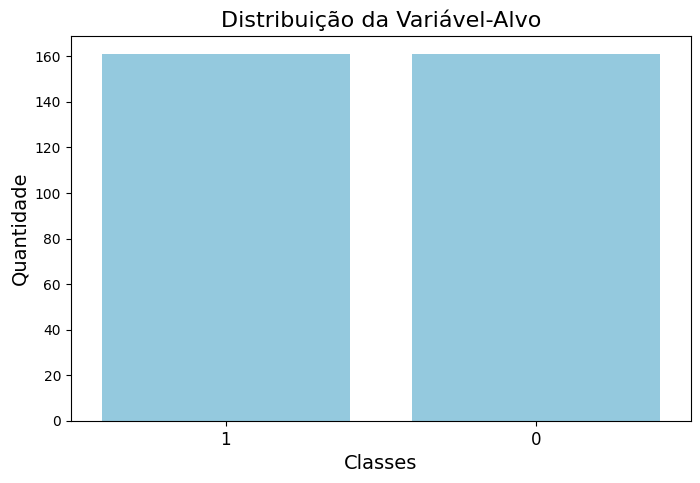

In [46]:
#Carregando o dataset
dataLoader = DataLoader('./Datasets/heart_failure_clinical_records_dataset.csv')
dataset_original = dataLoader.load_data()

#Modelo utilizado
model = ModelStrategy().ModelStrategy(ModelsType.LogisticRegression.value)

#Coluna alvo
target_column = DatasetColuns.DEATH_EVENT.value

#Balanceamento
class_balance = BalanceAnalyser(dataset_original, DatasetColuns.DEATH_EVENT.value, balance_strategy)
balance_dataset = class_balance.balance(BalanceTypes.SMOTETomek.value)

#Tratamento de outliers
class_outlier = OutlierAnalyzer(balance_dataset, target_column, outlier_detector_strategy, outlier_remover_strategy)
outlier_dataset = class_outlier.transform(OutliersRemovers.LOGARITIMO.value)

#Normalização
class_scaler = DataScaler(outlier_dataset, DatasetColuns.DEATH_EVENT.value, scaler_strategy)
scaler_dataset = class_scaler.scale_data(ScalerTypes.StandardScaler.value)

#Dataset final
final_dataset = scaler_dataset